In [1]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [189]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, distinct

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [102]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# My trip starts from 2017-08-01 and ends 2017-08-10

In [337]:
# Calculate the date 1 year ago from today
last_day = (dt.datetime.strptime('2017-08-01', '%Y-%m-%d') - dt.timedelta(days=365)).strftime('%Y-%m-%d')
last_day

'2016-08-01'

In [338]:
# Perform a query to retrieve the data and precipitation scores
last_year = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>='2016-08-01').\
        filter(Measurement.date<'2017-08-01').order_by(Measurement.date).all()

In [339]:
last_year

[('2016-08-01', 0.08),
 ('2016-08-01', 2.35),
 ('2016-08-01', None),
 ('2016-08-01', 0.54),
 ('2016-08-01', 3.53),
 ('2016-08-01', 2.21),
 ('2016-08-02', 0.05),
 ('2016-08-02', 0.2),
 ('2016-08-02', 0.55),
 ('2016-08-02', 0.0),
 ('2016-08-02', 0.07),
 ('2016-08-02', 0.83),
 ('2016-08-02', 1.14),
 ('2016-08-03', 0.0),
 ('2016-08-03', 0.02),
 ('2016-08-03', 0.0),
 ('2016-08-03', 0.02),
 ('2016-08-03', 0.0),
 ('2016-08-03', 0.01),
 ('2016-08-03', None),
 ('2016-08-04', 0.04),
 ('2016-08-04', 0.62),
 ('2016-08-04', 0.13),
 ('2016-08-04', 0.25),
 ('2016-08-04', 0.77),
 ('2016-08-04', None),
 ('2016-08-05', 0.01),
 ('2016-08-05', 0.03),
 ('2016-08-05', 0.03),
 ('2016-08-05', 0.0),
 ('2016-08-05', 0.27),
 ('2016-08-05', None),
 ('2016-08-06', 0.0),
 ('2016-08-06', 0.07),
 ('2016-08-06', None),
 ('2016-08-06', 0.04),
 ('2016-08-06', 0.14),
 ('2016-08-06', None),
 ('2016-08-07', 0.39),
 ('2016-08-07', 0.3),
 ('2016-08-07', 0.48),
 ('2016-08-07', 0.4),
 ('2016-08-07', 0.47),
 ('2016-08-07', 1.3)

In [121]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df1 = pd.DataFrame(last_year, columns=['date', 'precipitation'])

In [122]:
df1.head()

,date,precipitation
0,2016-08-01,0.08
1,2016-08-01,2.35
2,2016-08-01,NaN
3,2016-08-01,0.54
4,2016-08-01,3.53


In [123]:
# Sort the dataframe by date
df1.sort_values(by=['date'], ascending=True, inplace=True)

In [124]:
# We could change the date column to index
df1["date"]= pd.to_datetime(df1["date"], format='%Y-%m-%d', errors='coerce')
df1.set_index("date", inplace=True)

In [127]:
df1.head()

,precipitation
date,
2016-08-01,0.08
2016-08-01,2.35
2016-08-01,NaN
2016-08-01,0.54
2016-08-01,3.53


<IPython.core.display.Javascript object>


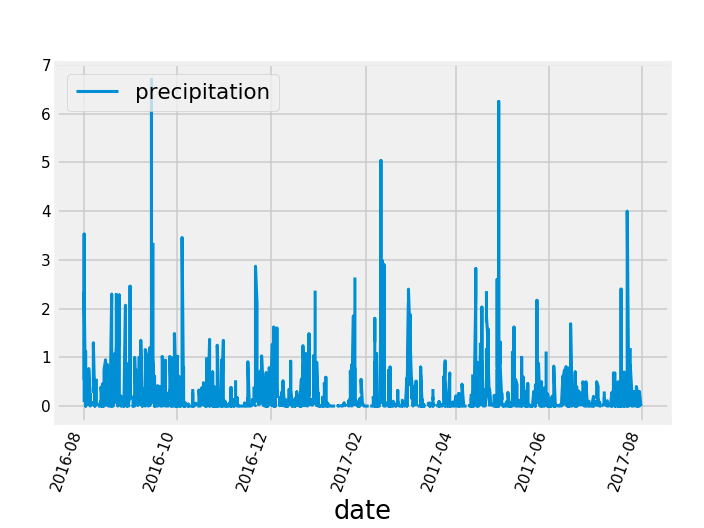

(array([736177., 736238., 736299., 736361., 736420., 736481., 736542.]),
 <a list of 7 Text xticklabel objects>)

In [223]:
# Use Pandas Plotting with Matplotlib to plot the data
# Rotate the xticks for the dates
df1.plot(lw=2)
plt.legend(loc="upper left")
plt.tick_params(axis='both', labelsize=10)
plt.xticks(rotation=70)

In [137]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df1.describe()

,precipitation
count,2067.000000
mean,0.187557
std,0.475160
min,0.000000
25%,0.000000
50%,0.020000
75%,0.140000
max,6.700000


In [179]:
# Check the column names of the measurement table
inspector = inspect(engine)
columns = inspector.get_columns('measurement')

for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [192]:
# How many stations are available in this dataset?
session.query(func.count(distinct(Measurement.station))).all()

[(9)]

In [182]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.id)).group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [195]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station=="USC00519281").all()

[(54.0, 85.0, 71.66378066378067)]

In [198]:
# Choose the station with the highest number of temperature observations.
session.query(Measurement.station, func.count(Measurement.tobs)).filter(Measurement.tobs!=None).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).first()

('USC00519281', 2772)

In [216]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_year_temp = session.query(Measurement.tobs).filter(Measurement.station=="USC00519281")\
        .filter(Measurement.date>='2016-08-01').filter(Measurement.date<'2017-08-01').all()

In [228]:
last_year_temp = [float(result[0]) for result in last_year_temp if result!=None]

<IPython.core.display.Javascript object>


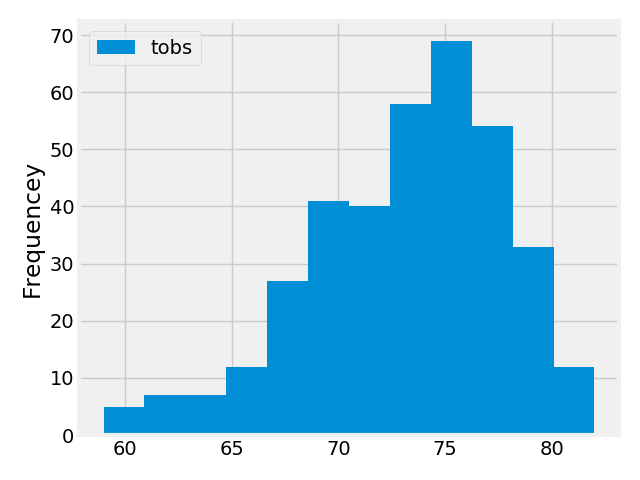

In [298]:
plt.hist(last_year_temp, bins="auto", label="tobs")
plt.legend(loc="upper left")
plt.ylabel("Frequencey")
plt.tight_layout()

In [235]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [236]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2016-08-01', '2016-08-10'))

[(72.0, 78.33846153846154, 83.0)]


In [277]:
temp_min = calc_temps('2016-08-01', '2016-08-10')[0][0]
temp_avg = calc_temps('2016-08-01', '2016-08-10')[0][1]
temp_max = calc_temps('2016-08-01', '2016-08-10')[0][2]

In [279]:
# Set the upper and lower bound of the error bar
error_bar_lower = temp_avg-temp_min
error_bar_higher = temp_max-temp_avg

<IPython.core.display.Javascript object>


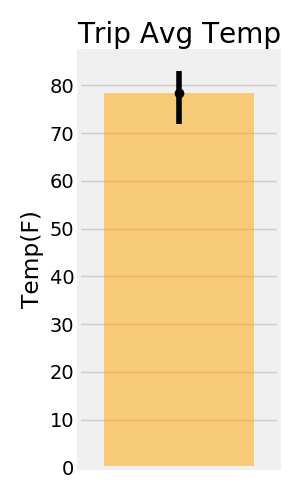

C:\Users\zhengy\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [316]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

plt.figure(figsize=(3,5))
plt.bar(1, temp_avg, width=0.3, color="orange", alpha=0.5)
plt.errorbar(1, temp_avg, yerr=[[error_bar_lower], [error_bar_higher]], fmt='--o', color="black")
plt.xlim(0.8,1.2)
plt.tick_params(axis='x', labelbottom=False)
plt.ylabel("Temp(F)")
plt.title("Trip Avg Temp")
ax = plt.axes()        
ax.xaxis.grid()
plt.tight_layout()

In [317]:
# Check the column names of the station table
inspector_station = inspect(engine)
columns_station = inspector.get_columns('station')

for column in columns_station:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [336]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
session.query(Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation, \
     func.sum(Measurement.prcp)).filter(Measurement.station == Station.station)\
    .filter(Measurement.date>='2016-08-01').filter(Measurement.date<'2016-08-11')\
    .group_by(Station.station).order_by(func.sum(Measurement.prcp).desc()).all()

[('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  6.319999999999998),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  5.229999999999999),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 3.92),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  1.3100000000000003),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  1.04),
 ('USC00519397',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0,
  0.5900000000000001),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.18)]

## Optional Challenge Assignment

In [353]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [356]:
# calculate the daily normals for your trip
trips = ["08-01", "08-02","08-03","08-04","08-05","08-06","08-07","08-08","08-09","08-10"]

In [358]:
normals = []
for trip in trips:
    normals.append(daily_normals(trip))

In [359]:
normals

[[(67.0, 75.54, 83.0)],
 [(68.0, 75.60377358490567, 84.0)],
 [(70.0, 76.61111111111111, 85.0)],
 [(69.0, 76.71153846153847, 84.0)],
 [(69.0, 76.14814814814815, 82.0)],
 [(67.0, 76.25, 83.0)],
 [(71.0, 77.15686274509804, 83.0)],
 [(68.0, 76.5576923076923, 83.0)],
 [(69.0, 75.98039215686275, 81.0)],
 [(65.0, 76.42, 83.0)]]

In [362]:
# push each tuple of calculations into a list called `normals`
[list(np.ravel(item)) for item in normals] 

[[67.0, 75.54, 83.0],
 [68.0, 75.60377358490567, 84.0],
 [70.0, 76.61111111111111, 85.0],
 [69.0, 76.71153846153847, 84.0],
 [69.0, 76.14814814814815, 82.0],
 [67.0, 76.25, 83.0],
 [71.0, 77.15686274509804, 83.0],
 [68.0, 76.5576923076923, 83.0],
 [69.0, 75.98039215686275, 81.0],
 [65.0, 76.42, 83.0]]

In [384]:
# Set the start and end date of the trip
start_date=dt.date(2017,8,1)
end_date=dt.date(2017,8,10)

In [385]:
# Use the start and end date to create a range of dates
days = [start_date]
while start_date!=end_date:
    start_date += dt.timedelta(days=1)
    days.append(start_date)

In [386]:
days

[datetime.date(2017, 8, 1),
 datetime.date(2017, 8, 2),
 datetime.date(2017, 8, 3),
 datetime.date(2017, 8, 4),
 datetime.date(2017, 8, 5),
 datetime.date(2017, 8, 6),
 datetime.date(2017, 8, 7),
 datetime.date(2017, 8, 8),
 datetime.date(2017, 8, 9),
 datetime.date(2017, 8, 10)]

In [388]:
# Stip off the year and save a list of %m-%d strings
date_list = []
for day in days:
    date_list.append(day.strftime("%m-%d"))

In [389]:
date_list

['08-01',
 '08-02',
 '08-03',
 '08-04',
 '08-05',
 '08-06',
 '08-07',
 '08-08',
 '08-09',
 '08-10']

In [398]:
daily_normals("08-03")

[(70.0, 76.61111111111111, 85.0)]

In [407]:
# Loop through the list of %m-%d strings and calculate the normals for each date
normals=[]
for item in date_list:
    normals.append(daily_normals(item)[0])

In [408]:
normals

[(67.0, 75.54, 83.0),
 (68.0, 75.60377358490567, 84.0),
 (70.0, 76.61111111111111, 85.0),
 (69.0, 76.71153846153847, 84.0),
 (69.0, 76.14814814814815, 82.0),
 (67.0, 76.25, 83.0),
 (71.0, 77.15686274509804, 83.0),
 (68.0, 76.5576923076923, 83.0),
 (69.0, 75.98039215686275, 81.0),
 (65.0, 76.42, 83.0)]

In [414]:
tmin = [normal[0] for normal in normals]
tavg = [normal[1] for normal in normals]
tmax = [normal[2] for normal in normals]

In [415]:
# make the resutls as a pandas dataframe
df = pd.DataFrame({"date": date_list, "tmin":tmin, "tavg": tavg, "tmax": tmax})

In [416]:
df

,date,tavg,tmax,tmin
0,08-01,75.540000,83.0,67.0
1,08-02,75.603774,84.0,68.0
2,08-03,76.611111,85.0,70.0
3,08-04,76.711538,84.0,69.0
4,08-05,76.148148,82.0,69.0
5,08-06,76.250000,83.0,67.0
6,08-07,77.156863,83.0,71.0
7,08-08,76.557692,83.0,68.0
8,08-09,75.980392,81.0,69.0
9,08-10,76.420000,83.0,65.0


<IPython.core.display.Javascript object>


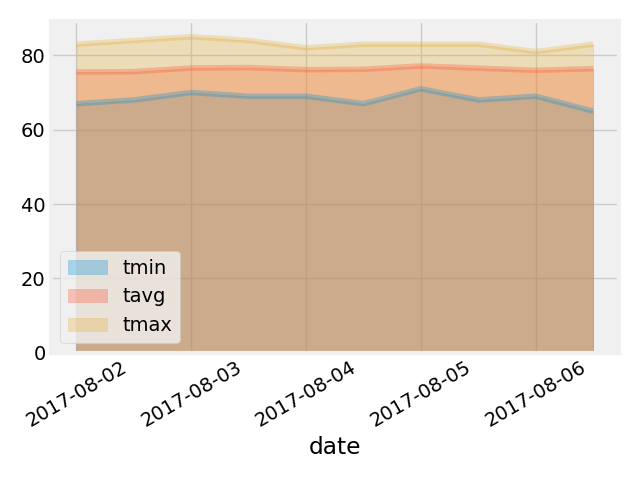

In [436]:
# Plot the daily normals as an area plot with `stacked=False`
fig, ax = plt.subplots()
df[["tmin","tavg","tmax"]].plot.area(stacked=False, ax=ax, alpha=0.3)
ax.set_xticklabels("2017-"+df["date"], rotation=30)
plt.xlabel("date")
plt.tight_layout()